# New York City Tree Census - Data Cleaning

This project uses the [2015 Street Tree Census - Tree Data](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh) dataset sourced from New York OpenData website. The dataset contains:
> Street tree data from the TreesCount! 2015 Street Tree Census, conducted by volunteers and staff organized by NYC Parks & Recreation and partner organizations. Tree data collected includes tree species, diameter and perception of health.

## Project Overview
To produce a clean dataset which will be used to gain a general understanding of the health of the trees in New York City, and any contribution factors to good or poor health. The process of cleaning the dataset includes checking data types, correcting null values and outliers and checking that values are standardized.


## Stage 1 - Data Exploration

This stage is meant to be an initial exploration of the dataset to get a deeper understanding of the dataset and identify any issues that need to be fixed in the data cleaning stage.

In [9]:
# Install libraries
# !pip3 install pandas
# !pip3 install matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Setting to show all columns
pd.set_option('display.max_columns', None)

# Setting to show all rows
# pd.set_option('display.max_rows', None)

The dataset has a lot of "None" values which are valid responses. By default, read_csv() parses "None" as NaN, which would change the valid responses to null response. To remedy this, specifying our own NaN values (i.e. "" or empty strings), we can override the default behaviour.

In [10]:
# Load csv file into a dataframe
tree_census = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_20240108.csv', keep_default_na=False, na_values="")

In [11]:
tree_census.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [12]:
tree_census.shape

(683788, 45)

In [13]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [14]:
# Create a new dataframe with a subset of the needed columns
tree_census_subset = tree_census[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'zip_city', 'borough', 'nta_name', 'latitude', 'longitude']]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.723092,-73.844215
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Whitestone,Queens,Whitestone,40.794111,-73.818679
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,North Side-South Side,40.713211,-73.954944
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.715194,-73.856650
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Westerleigh,40.620762,-74.136517
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.850828,-73.903115


In [15]:
tree_census_subset.dtypes

tree_id         int64
tree_dbh        int64
stump_diam      int64
curb_loc       object
status         object
health         object
spc_latin      object
spc_common     object
steward        object
guards         object
sidewalk       object
problems       object
root_stone     object
root_grate     object
root_other     object
trunk_wire     object
trnk_light     object
trnk_other     object
brch_light     object
brch_shoe      object
brch_other     object
zip_city       object
borough        object
nta_name       object
latitude      float64
longitude     float64
dtype: object

The tree_id should be of type string instead of integer.

In [16]:
# Check for null values
tree_census_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
zip_city          0
borough           0
nta_name          0
latitude          0
longitude         0
dtype: int64

The documentation for the dataset indicated that the **health, steward, guard and sidewalk fields** are left blank if the tree is **dead or a stump**.
The assumption is made that it would be difficult to determine the latin and common names for dead trees and stumps, and that problems would not be recorded for dead trees and stumps because they are not relevant.

In [17]:
# Create a dataframe for dead trees and stumps
dead_or_stump = tree_census_subset[tree_census_subset['status'].isin(['Dead', 'Stump'])]
dead_or_stump

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Astoria,Queens,Steinway,40.774993,-73.922037
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871927,-73.882349
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bushwick North,40.705742,-73.917849
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.559061,-74.106038
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Astoria,Queens,Steinway,40.772483,-73.909073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,New York,Manhattan,Upper East Side-Carnegie Hill,40.785136,-73.951109
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Erasmus,40.647154,-73.955619
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Annadale-Huguenot-Prince's Bay-Eltingville,40.528544,-74.165246
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Gravesend,40.590385,-73.972892


In [18]:
# Total dead trees and stumps
dead_or_stump['tree_id'].count()

31615

There are 31615 records in the dataset where the status is either dead or stumps. This accounts for a majority of the missing values in the dataset.

In [19]:
# Descriptive statistics of tree and stump diameter
tree_census_subset[['tree_dbh', 'stump_diam']].describe()

,tree_dbh,stump_diam
count,683788.000000,683788.000000
mean,11.279787,0.432463
std,8.723042,3.290241
min,0.000000,0.000000
25%,4.000000,0.000000
50%,9.000000,0.000000
75%,16.000000,0.000000
max,450.000000,140.000000


The diameter is measured in inches. The max for the tree diameter at breast height, and the stump diameter appear to be too large compared to the mean and the 75th percentile. The assumption is that some error was made when the data was being entered.

array([[<Axes: title={'center': 'tree_dbh'}>,
        <Axes: title={'center': 'stump_diam'}>]], dtype=object)

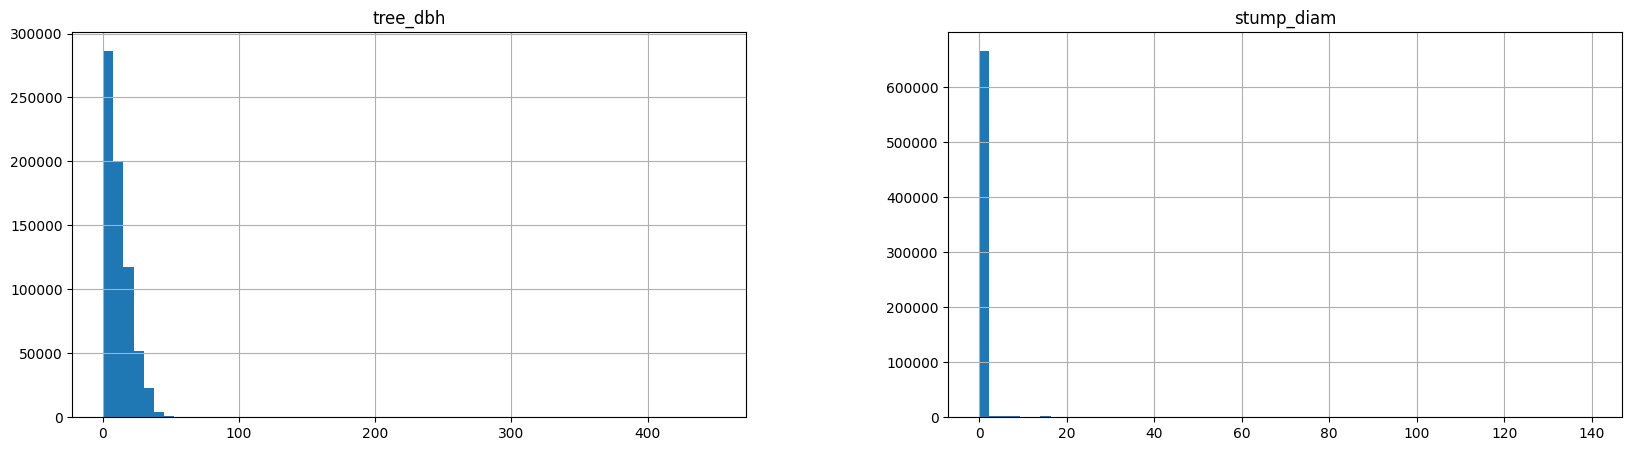

In [20]:
# Visualize the distribution of tree and stump diameter
tree_census_subset[['tree_dbh', 'stump_diam']].hist(bins=60, figsize=(20,5))

In [21]:
# Subset of trees with large diameters
big_trees = tree_census_subset[tree_census_subset['tree_dbh'] > 50]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,Whitestone,Queens,Whitestone,40.789872,-73.803291
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Woodlawn-Wakefield,40.894886,-73.847206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Flushing,Queens,Auburndale,40.762782,-73.788133
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.714634,-73.834046
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,white oak,None,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,Flushing,Queens,Flushing,40.763128,-73.825290
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752


<Axes: title={'center': 'Scatter plot of Trees with Larger than 50 Diameter at Breast Height'}, xlabel='tree_id', ylabel='tree_dbh'>

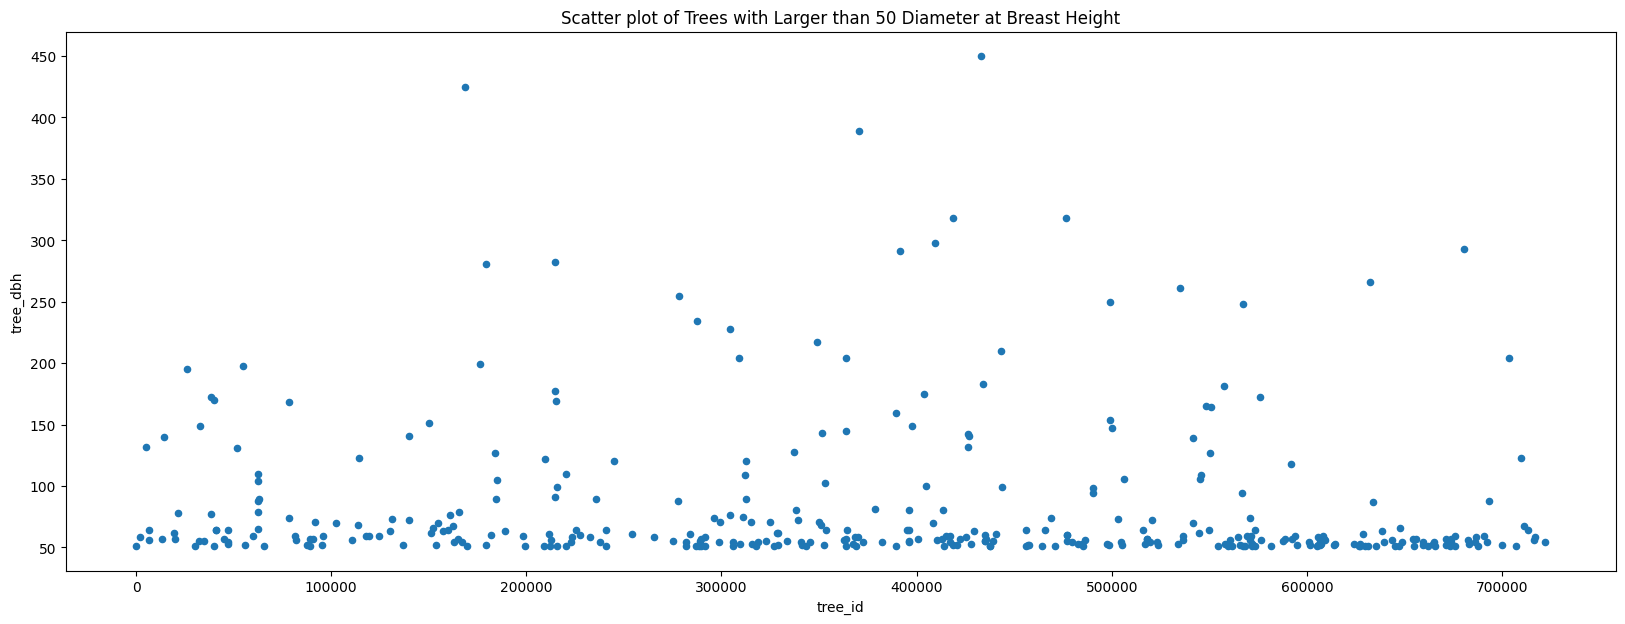

In [22]:
# Visualize the spread of large trees to identify outliers
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', title="Scatter plot of Trees with Larger than 50 Diameter at Breast Height", figsize=(20,7))

In [23]:
# Subset of stumps with large diameters
big_stumps = tree_census_subset[tree_census_subset['stump_diam'] >= 50]
big_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
6122,200925,0,52,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,40.587284,-73.943331
6177,200924,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,40.587082,-73.943292
6331,214426,0,50,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bayside,Queens,Bayside-Bayside Hills,40.766014,-73.769040
6466,166008,0,72,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237
7042,206818,0,100,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645994,135904,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Jamaica,Queens,Jamaica Estates-Holliswood,40.717755,-73.787908
646336,151125,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Hollis,Queens,Jamaica Estates-Holliswood,40.719588,-73.761745
649174,154188,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Kensington-Ocean Parkway,40.645376,-73.983917
652690,154181,0,60,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Kensington-Ocean Parkway,40.645820,-73.982780


<Axes: title={'center': 'Scatter plot of Stumps with Larger than 50 Diameter'}, xlabel='tree_id', ylabel='stump_diam'>

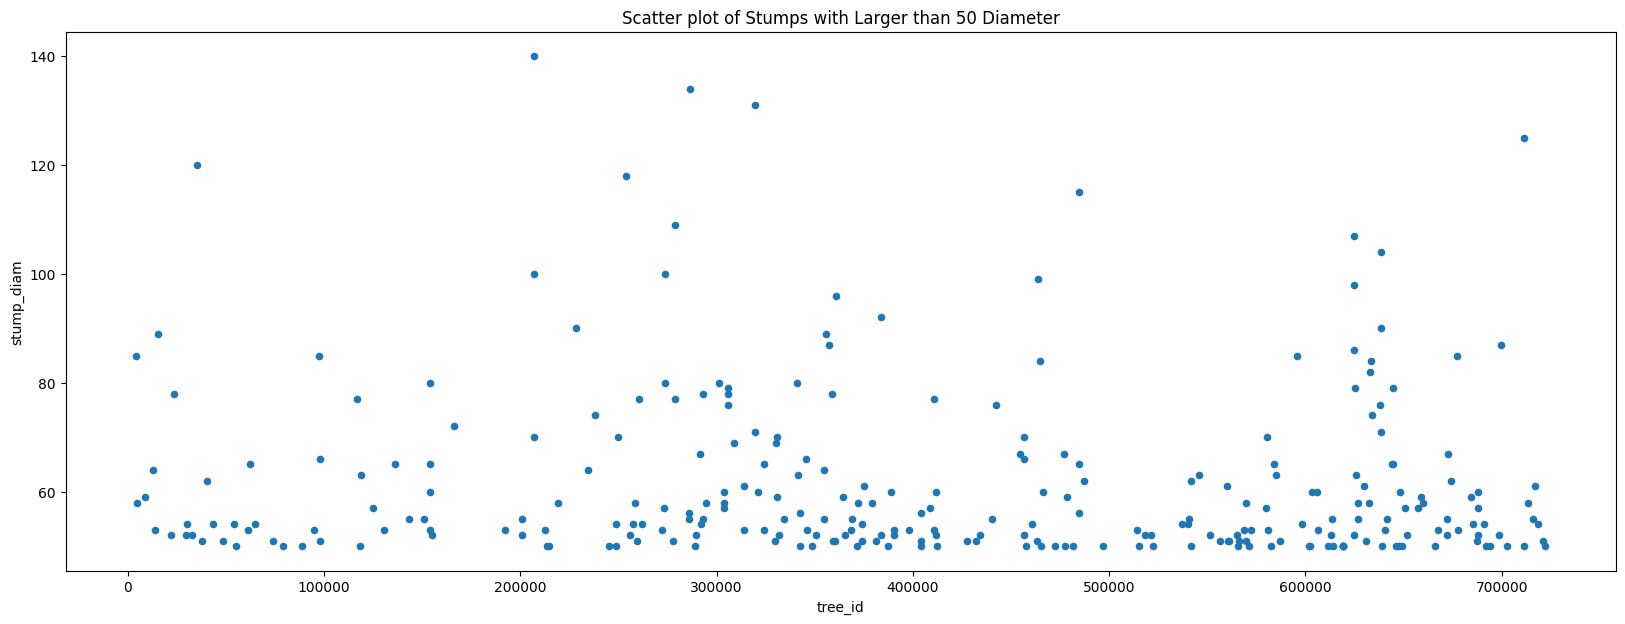

In [24]:
# Visualize the spread of large stumps to identify outliers
big_stumps[['tree_id', 'stump_diam']].plot(kind='scatter', x='tree_id', y='stump_diam', title="Scatter plot of Stumps with Larger than 50 Diameter", figsize=(20,7))

For both the tree and stump diameter, there appears to be a significant number of records with 50~ inches as the diameter. Therefore, 60 inches would be a good cut off point for outliers, and will be used later in the data cleaning process.

In [25]:
# Subset of trees with small diameters
small_trees = tree_census_subset[(tree_census_subset['tree_dbh'] == 0) & (tree_census_subset['status']!= 'Stump')]
small_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871927,-73.882349
645,184295,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Belmont,40.857876,-73.887850
3661,149207,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,New York,Manhattan,Yorkville,40.773569,-73.949697
5312,38793,0,0,OnCurb,Alive,Good,Cotinus coggygria,smoketree,3or4,Helpful,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Windsor Terrace,40.657517,-73.981138
6054,187798,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871095,-73.882113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677564,198951,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,New York,Manhattan,Clinton,40.762477,-73.988659
677712,187797,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871020,-73.882091
677735,187795,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.870829,-73.882037
680530,51015,0,0,OnCurb,Alive,Good,Acer palmatum,Japanese maple,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bayside,Queens,Bayside-Bayside Hills,40.767194,-73.769383


In [26]:
# Subset of stumps with small diameters
small_stumps = tree_census_subset[(tree_census_subset['stump_diam'] == 0) & (tree_census_subset['status'] == 'Stump')]
small_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude


There are 278 live and dead trees with tree diameters set at 0 which should not be the case. In the case of stumps, no records have 0 as the stump diameter which is as it should be.

At this point, we're checking if the data is standardized for the categorical fields: steward, guards, status, etc.

In [27]:
# Count of tree types based on their common names
tree_census_subset['spc_common'].value_counts()

spc_common
London planetree    87014
honeylocust         64264
Callery pear        58931
pin oak             53185
Norway maple        34189
                    ...  
black pine             37
pitch pine             33
Osage-orange           29
Scots pine             25
Virginia pine          10
Name: count, Length: 132, dtype: int64

In [28]:
# Count of tree types based on their common names
tree_census_subset['spc_latin'].value_counts()

spc_latin
Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: count, Length: 132, dtype: int64

At a glance, there doesn't appear to be any mismatch between the count of trees based on the latin and common names.

In [29]:
tree_census_subset['steward'].value_counts()

steward
None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: count, dtype: int64

In [30]:
tree_census_subset['guards'].value_counts()

guards
None       572306
Helpful     51866
Harmful     20252
Unsure       7748
Name: count, dtype: int64

In [31]:
tree_census_subset['status'].value_counts()

status
Alive    652173
Stump     17654
Dead      13961
Name: count, dtype: int64

In [32]:
tree_census_subset['curb_loc'].value_counts()

curb_loc
OnCurb            656896
OffsetFromCurb     26892
Name: count, dtype: int64

In [33]:
tree_census_subset['health'].value_counts()

health
Good    528850
Fair     96504
Poor     26818
Name: count, dtype: int64

In [34]:
tree_census_subset['sidewalk'].value_counts()

sidewalk
NoDamage    464978
Damage      187194
Name: count, dtype: int64

In [35]:
# Create a subset of columns which capture problems related to the trees
tree_problems = tree_census_subset[['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [36]:
# Checking which problems are most common
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


## Stage 2 - Data Cleaning

### Data Types

In [37]:
# Change the tree_id datatype from integer to string
tree_census_subset['tree_id'] = tree_census_subset['tree_id'].astype('str')
tree_census_subset.dtypes

C:\Users\spatten\AppData\Local\Temp\ipykernel_20996\2916210692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['tree_id'] = tree_census_subset['tree_id'].astype('str')


tree_id        object
tree_dbh        int64
stump_diam      int64
curb_loc       object
status         object
health         object
spc_latin      object
spc_common     object
steward        object
guards         object
sidewalk       object
problems       object
root_stone     object
root_grate     object
root_other     object
trunk_wire     object
trnk_light     object
trnk_other     object
brch_light     object
brch_shoe      object
brch_other     object
zip_city       object
borough        object
nta_name       object
latitude      float64
longitude     float64
dtype: object

### Null Values

Recall that for dead trees and stumps, health, steward, guards, sidewalk, problems, and names were not recorded. Those null values will be filled with **NotApplicable**.

In [38]:
# Fill the NaN values with NotApplicable where a tree is either Dead or a Stump
mask = ((tree_census_subset['status'] == 'Stump') | (tree_census_subset['status'] == 'Dead'))
tree_census_subset.loc[mask] = tree_census_subset.loc[mask].fillna('NotApplicable')
tree_census_subset[tree_census_subset['status'].isin(['Dead', 'Stump'])]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
37,211205,0,16,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Astoria,Queens,Steinway,40.774993,-73.922037
57,187807,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871927,-73.882349
196,208322,10,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bushwick North,40.705742,-73.917849
209,209058,6,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.559061,-74.106038
239,203597,0,15,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Astoria,Queens,Steinway,40.772483,-73.909073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,New York,Manhattan,Upper East Side-Carnegie Hill,40.785136,-73.951109
683695,170888,0,5,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Erasmus,40.647154,-73.955619
683697,177922,0,17,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Annadale-Huguenot-Prince's Bay-Eltingville,40.528544,-74.165246
683698,193791,3,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Gravesend,40.590385,-73.972892


In [39]:
tree_census_subset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
spc_common     5
steward        0
guards         1
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
zip_city       0
borough        0
nta_name       0
latitude       0
longitude      0
dtype: int64

Majority of the NaN values have been filled. The remaining records will be examined individually.

In [40]:
tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,green ash,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Rossville-Woodrow,40.548597,-74.216412


In [41]:
tree_census_subset[tree_census_subset['guards'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
427541,630814,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No,Little Neck,Queens,Douglas Manor-Douglaston-Little Neck,40.771945,-73.750414


In [42]:
tree_census_subset[tree_census_subset['sidewalk'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
346299,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NaN,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Ozone Park,40.67909,-73.864029


In [43]:
tree_census_subset[tree_census_subset['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
356613,562532,4,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,Whitestone,Queens,Whitestone,40.791332,-73.803610
427541,630814,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No,Little Neck,Queens,Douglas Manor-Douglaston-Little Neck,40.771945,-73.750414
431417,651014,40,0,OnCurb,Alive,Good,NaN,NaN,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Woodhaven,Queens,Woodhaven,40.686902,-73.859411
608632,47941,5,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Middle Village,Queens,Middle Village,40.723484,-73.880296
656960,150745,3,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Williamsbridge-Olinville,40.894521,-73.858255


Checking the most common value for the categorical fields. These will be use this to fill the remaining NaN values.

In [44]:
tree_census_subset['health'].value_counts()

health
Good             528850
Fair              96504
NotApplicable     31615
Poor              26818
Name: count, dtype: int64

In [45]:
tree_census_subset['guards'].value_counts()

guards
None             572306
Helpful           51866
NotApplicable     31615
Harmful           20252
Unsure             7748
Name: count, dtype: int64

In [46]:
tree_census_subset['sidewalk'].value_counts()

sidewalk
NoDamage         464978
Damage           187194
NotApplicable     31615
Name: count, dtype: int64

In [47]:
tree_census_subset['problems'].value_counts()

problems
None                                                                          426280
Stones                                                                         95673
NotApplicable                                                                  31615
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,RootOther,TrunkLights,BranchLights                                     1
WiresRope,TrunkOther,BranchLights,Sneakers                                         1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: count, Length: 233, dtype: int64

In [48]:
# Fill the remaining NaN values
# Using Indeterminable for the latin and common names
tree_census_subset['health'].fillna('Good', inplace=True)
tree_census_subset['guards'].fillna('None', inplace=True)
tree_census_subset['problems'].fillna('None', inplace=True)
tree_census_subset['sidewalk'].fillna('NoDamage', inplace=True)
tree_census_subset['spc_latin'].fillna('Indeterminable', inplace=True)
tree_census_subset['spc_common'].fillna('Indeterminable', inplace=True)

C:\Users\spatten\AppData\Local\Temp\ipykernel_20996\1679586266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['health'].fillna('Good', inplace=True)
C:\Users\spatten\AppData\Local\Temp\ipykernel_20996\1679586266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['guards'].fillna('None', inplace=True)
C:\Users\spatten\AppData\Local\Temp\ipykernel_20996\1679586266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [49]:
# Check that no null/NaN values remain
tree_census_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
zip_city      0
borough       0
nta_name      0
latitude      0
longitude     0
dtype: int64

Yaaay! No more null values!

### Outliers

The outliers observed during the exploration stage were:
1. Alive and dead trees with large diameters.
2. Stumps with large diameters.
3. Alive and dead trees with 0 as the diameter.

No records will be dropped from the dataset. The aim is to fix all outliers and keep all records in the dataset.

Steps:
1. Separate the outliers from the dataset. This includes records considered too large and too small.
2. The dataset without outliers will be used to calculate the statistics used to adjust the outliers. This will prevent the values from being skewed.
3. In the subset of outliers, for those records with latin or common names, replace the tree diameter with the upper percentile based on the tree name.
4. For trees without names, replace the tree diameter with the 75th percentile value.
5. For the stumps, replace the stump diameter with the 75th percentile value.
6. For the small trees, replace the tree diameter with the 25th percentile value.


Create 2 dataframe with the outliers. One with the trees and stumps whose diameters are too large, and another with trees whose diameters are 0.

In [50]:
# Subset of trees and stumps with diameters greater than 60 (outliers)
big_trees_stumps = tree_census_subset[(tree_census_subset['tree_dbh'] > 60) | (tree_census_subset['stump_diam'] > 60)]
big_trees_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712
6466,166008,0,72,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959
7042,206818,0,100,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Springfield Gardens,Queens,Springfield Gardens South-Brookville,40.662039,-73.745916
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bensonhurst West,40.611377,-74.001723
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.855704,-73.899953
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752


In [51]:
# Subset of trees with small diameters
small_trees = tree_census_subset[(tree_census_subset['tree_dbh'] == 0) & (tree_census_subset['status']!= 'Stump')]
small_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
57,187807,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871927,-73.882349
645,184295,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Belmont,40.857876,-73.887850
3661,149207,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,New York,Manhattan,Yorkville,40.773569,-73.949697
5312,38793,0,0,OnCurb,Alive,Good,Cotinus coggygria,smoketree,3or4,Helpful,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Windsor Terrace,40.657517,-73.981138
6054,187798,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871095,-73.882113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677564,198951,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,New York,Manhattan,Clinton,40.762477,-73.988659
677712,187797,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871020,-73.882091
677735,187795,0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.870829,-73.882037
680530,51015,0,0,OnCurb,Alive,Good,Acer palmatum,Japanese maple,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bayside,Queens,Bayside-Bayside Hills,40.767194,-73.769383


Drop the rows from the dataframes with the outliers from the main dataframe. This is so we have a clean dataframe to use in calculating the statistical data.

In [52]:
tree_census_subset = tree_census_subset.drop(big_trees_stumps.index)
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.723092,-73.844215
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Whitestone,Queens,Whitestone,40.794111,-73.818679
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,North Side-South Side,40.713211,-73.954944
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.715194,-73.856650
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Westerleigh,40.620762,-74.136517
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.850828,-73.903115


In [53]:
tree_census_subset = tree_census_subset.drop(small_trees.index)
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.723092,-73.844215
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Whitestone,Queens,Whitestone,40.794111,-73.818679
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,North Side-South Side,40.713211,-73.954944
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.715194,-73.856650
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Westerleigh,40.620762,-74.136517
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.850828,-73.903115


In [54]:
# Separate dataframe for alive vs dead and stump trees because certain values aren't recorded depending on the status
alive_trees = tree_census_subset[tree_census_subset['status'] == 'Alive']
dead_or_stump_trees = tree_census_subset[tree_census_subset['status'].isin(['Dead', 'Stump'])]

In [55]:
# Get the descriptive statistics for the diameter for the alive trees
alive_trees['tree_dbh'].describe()

count    651801.000000
mean         11.688218
std           8.399915
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max          60.000000
Name: tree_dbh, dtype: float64

In [56]:
# Get the descriptive statistics for the diameter for stumps
tree_census_subset[tree_census_subset['status'] == 'Stump']['stump_diam'].describe()

count    17562.000000
mean        16.422731
std         11.155683
min          1.000000
25%          7.000000
50%         14.000000
75%         23.000000
max         60.000000
Name: stump_diam, dtype: float64

In [57]:
# Get the upper and lower percentile grouped by latin name
alive_trees_stats = alive_trees.filter(items=['spc_latin', 'tree_dbh']).groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin', '25%', '75%']]
alive_trees_stats

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


In [58]:
# Merging the 25% and 75% columns which wil be used to compare the tree diameter based on latin name
big_trees_stumps = big_trees_stumps.merge(alive_trees_stats, on='spc_latin', how='left')
big_trees_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude,25%,75%
0,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936,3.0,5.0
1,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712,13.0,28.0
2,166008,0,72,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237,NaN,NaN
3,209349,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959,8.0,24.0
4,206818,0,100,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Springfield Gardens,Queens,Springfield Gardens South-Brookville,40.662039,-73.745916,4.0,16.0
241,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bensonhurst West,40.611377,-74.001723,6.0,13.0
242,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.855704,-73.899953,4.0,12.0
243,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752,8.0,24.0


In [72]:
tree_census_subset[(tree_census_subset['tree_dbh']==0) & (tree_census_subset['status']!='Stump')]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude


In [60]:
# Change the values for large outliers to the value of the 75th percentile
mask = big_trees_stumps['tree_dbh']>big_trees_stumps['75%']
big_trees_stumps.loc[mask, 'tree_dbh'] = big_trees_stumps['75%']
big_trees_stumps

C:\Users\spatten\AppData\Local\Temp\ipykernel_20996\1740207086.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5.   28.   24.   13.   16.    5.   27.   24.75 14.   16.   14.75 18.
 28.   15.   27.   24.   16.   11.   11.   27.   11.   24.   16.   11.
 11.   13.   17.   12.   13.   20.   24.   13.   13.   20.   11.    7.
 27.   11.   16.   27.   15.   15.   28.    7.   12.   13.    7.   27.
 27.   13.   24.75 27.   18.   13.   17.    7.   27.   27.   18.   11.
 11.   11.   27.   13.    5.   13.   17.   13.   24.   11.   13.   28.
 11.   12.   12.   11.   14.   27.   11.   17.   13.   11.   14.   11.
 28.   24.   13.   11.   27.   18.   28.   27.   27.   27.   11.   13.
 10.   27.   14.   24.   27.   24.   13.   27.   18.   20.   27.   24.
 17.   27.    7.   24.   27.   27.   13.   11.   17.   17.   17.   17.
 17.   17.   13.   11.   13.   18.    7.   20.   24.   24.    7.75 11.
 27.   11.   24.   28.   27.   2

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude,25%,75%
0,168583,5.0,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936,3.0,5.0
1,139665,28.0,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712,13.0,28.0
2,166008,0.0,72,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237,NaN,NaN
3,209349,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959,8.0,24.0
4,206818,0.0,100,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,151958,16.0,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Springfield Gardens,Queens,Springfield Gardens South-Brookville,40.662039,-73.745916,4.0,16.0
241,165324,13.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bensonhurst West,40.611377,-74.001723,6.0,13.0
242,184879,12.0,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.855704,-73.899953,4.0,12.0
243,179366,24.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752,8.0,24.0


In [61]:
# Checking to see how many large outliers remaining
big_trees_stumps[(big_trees_stumps['tree_dbh'] > 60) | (big_trees_stumps['stump_diam'] > 60)]['status'].value_counts()

status
Stump    92
Dead      3
Name: count, dtype: int64

In [62]:
# All the remaining outliers don't have a latin name so we'll use overall value for the 75th percentile for alive trees (16.0 inches) to update those
mask = big_trees_stumps['tree_dbh']>60.0
big_trees_stumps.loc[mask, 'tree_dbh'] = 16.0
big_trees_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude,25%,75%
0,168583,5.0,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936,3.0,5.0
1,139665,28.0,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712,13.0,28.0
2,166008,0.0,72,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237,NaN,NaN
3,209349,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959,8.0,24.0
4,206818,0.0,100,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,151958,16.0,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Springfield Gardens,Queens,Springfield Gardens South-Brookville,40.662039,-73.745916,4.0,16.0
241,165324,13.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bensonhurst West,40.611377,-74.001723,6.0,13.0
242,184879,12.0,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.855704,-73.899953,4.0,12.0
243,179366,24.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752,8.0,24.0


In [63]:
# Checking to see how many large outliers remaining
big_trees_stumps[(big_trees_stumps['tree_dbh'] > 60) | (big_trees_stumps['stump_diam'] > 60)]['status'].value_counts()

status
Stump    92
Name: count, dtype: int64

In [64]:
# Only the stumps remain so we'll use overall value for the 75th percentile for stumps (23.0 inches) to update those
mask = big_trees_stumps['stump_diam']>60.0
big_trees_stumps.loc[mask, 'stump_diam'] = 23.0
big_trees_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude,25%,75%
0,168583,5.0,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936,3.0,5.0
1,139665,28.0,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712,13.0,28.0
2,166008,0.0,23,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237,NaN,NaN
3,209349,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959,8.0,24.0
4,206818,0.0,23,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,151958,16.0,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Springfield Gardens,Queens,Springfield Gardens South-Brookville,40.662039,-73.745916,4.0,16.0
241,165324,13.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bensonhurst West,40.611377,-74.001723,6.0,13.0
242,184879,12.0,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.855704,-73.899953,4.0,12.0
243,179366,24.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752,8.0,24.0


In [65]:
# Checking if all the large outliers were fixed
big_trees_stumps[(big_trees_stumps['tree_dbh'] > 60) | (big_trees_stumps['stump_diam'] > 60)]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude,25%,75%


No large outliers remain.

In [66]:
# Dropping the 25% and 75% columns
big_trees_stumps = big_trees_stumps.drop(['25%', '75%'], axis=1)
big_trees_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
0,168583,5.0,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672287,-73.946936
1,139665,28.0,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,New Dorp-Midland Beach,40.572363,-74.091712
2,166008,0.0,23,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Crown Heights North,40.672036,-73.942237
3,209349,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Staten Island,Staten Island,Oakwood-Oakwood Beach,40.562379,-74.115959
4,206818,0.0,23,OnCurb,Stump,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Flushing,Queens,Queensboro Hill,40.747117,-73.833058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,151958,16.0,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Springfield Gardens,Queens,Springfield Gardens South-Brookville,40.662039,-73.745916
241,165324,13.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Bensonhurst West,40.611377,-74.001723
242,184879,12.0,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Bronx,Bronx,Mount Hope,40.855704,-73.899953
243,179366,24.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.734074,-73.850752


In [67]:
# Update records where tree diameter is zero and it's not a Stump with the 25% percentile value for alive trees (5.0 inches)
mask = (small_trees['tree_dbh']==0) & (small_trees['status']!='Stump')
small_trees.loc[mask, 'tree_dbh'] = 5.0
small_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
57,187807,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871927,-73.882349
645,184295,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Belmont,40.857876,-73.887850
3661,149207,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,New York,Manhattan,Yorkville,40.773569,-73.949697
5312,38793,5,0,OnCurb,Alive,Good,Cotinus coggygria,smoketree,3or4,Helpful,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Windsor Terrace,40.657517,-73.981138
6054,187798,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871095,-73.882113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677564,198951,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,New York,Manhattan,Clinton,40.762477,-73.988659
677712,187797,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871020,-73.882091
677735,187795,5,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.870829,-73.882037
680530,51015,5,0,OnCurb,Alive,Good,Acer palmatum,Japanese maple,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bayside,Queens,Bayside-Bayside Hills,40.767194,-73.769383


In [68]:
# Checking that no records remain for trees with a diameter of 0
tree_census_subset[(tree_census_subset['tree_dbh']==0) & (tree_census_subset['status']!='Stump')]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude


In [69]:
# Merge the dataframes together into a final clean dataset
tree_census_subset_clean = pd.concat([tree_census_subset, big_trees_stumps, small_trees])
tree_census_subset_clean

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,zip_city,borough,nta_name,latitude,longitude
0,180683,3.0,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Forest Hills,Queens,Forest Hills,40.723092,-73.844215
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Whitestone,Queens,Whitestone,40.794111,-73.818679
2,204026,3.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.717581,-73.936608
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,East Williamsburg,40.713537,-73.934456
4,189565,21.0,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn,Brooklyn,Park Slope-Gowanus,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677564,198951,5.0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,New York,Manhattan,Clinton,40.762477,-73.988659
677712,187797,5.0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.871020,-73.882091
677735,187795,5.0,0,OnCurb,Dead,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,No,No,No,No,No,No,No,No,Bronx,Bronx,Norwood,40.870829,-73.882037
680530,51015,5.0,0,OnCurb,Alive,Good,Acer palmatum,Japanese maple,1or2,None,NoDamage,None,No,No,No,No,No,No,No,No,No,Bayside,Queens,Bayside-Bayside Hills,40.767194,-73.769383


We can confirm that the final dataframe contains all the rows from the original dataset and a subset of 25 selected columns.

In [71]:
# Export dataframe to csv or excel
# tree_census_subset_clean.to_csv('nyc_tree_census_2015_clean.csv', index=False)
# tree_census_subset_clean.to_excel('nyc_tree_census_2015_clean.xlsx', index=False)